In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sqlalchemy.dialects.mssql.information_schema import columns

In [16]:
df = pd.read_csv('data/Filosofi2017_carreaux_200m_met.csv', low_memory=False)
df.drop(['Idcar_200m', 'Idcar_1km', 'I_est_1km', 'Idcar_nat', 'lcog_geo'], axis=1, inplace=True)
df

,I_est_200,Groupe,Ind,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men
0,1,14863,2.0,0.3,0.0,0.6,0.0,59349.4,145.1,0.1,...,0.3,0.2,0.0,0.4,0.3,0.7,0.1,0.0,0.2,0.9
1,1,14863,1.0,0.2,0.0,0.3,0.0,29674.7,72.5,0.0,...,0.1,0.1,0.0,0.2,0.1,0.4,0.1,0.0,0.1,0.4
2,1,14863,5.0,0.9,0.1,1.5,0.1,148373.6,362.7,0.2,...,0.6,0.4,0.1,1.1,0.7,1.8,0.3,0.0,0.4,2.2
3,1,14863,3.0,0.5,0.1,0.9,0.1,89024.2,217.6,0.1,...,0.4,0.2,0.1,0.6,0.4,1.1,0.2,0.0,0.3,1.3
4,1,175938,2.0,0.2,0.1,0.7,0.1,54304.3,111.4,0.1,...,0.1,0.0,0.2,0.6,0.5,0.4,0.1,0.0,0.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294771,0,1016961,106.5,37.0,0.0,23.0,10.0,2079917.6,3820.0,53.0,...,9.0,5.0,14.0,18.0,25.0,28.0,2.0,0.0,14.0,65.0
2294772,0,1016963,22.0,10.0,0.0,12.0,1.0,409078.7,1024.0,12.0,...,0.0,0.0,1.0,1.0,5.0,12.0,3.0,0.0,6.0,16.0
2294773,1,398106,14.0,6.3,0.0,8.7,0.0,365259.0,448.0,9.6,...,0.0,0.0,0.5,2.4,2.4,6.3,2.4,0.0,1.0,10.1
2294774,1,398106,14.0,6.3,0.0,8.7,0.0,365259.0,448.0,9.6,...,0.0,0.0,0.5,2.4,2.4,6.3,2.4,0.0,1.0,10.1


In [14]:
X = StandardScaler().fit_transform(df)

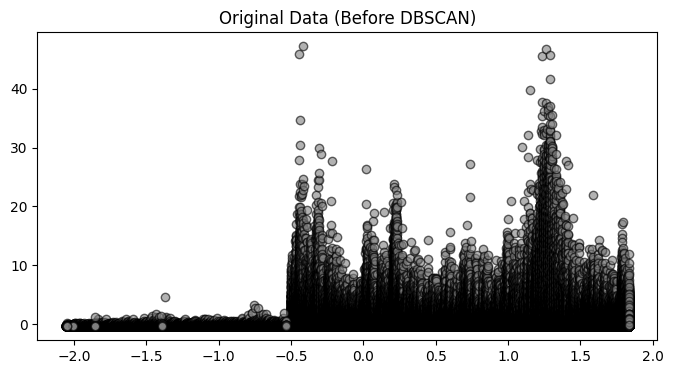

In [12]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 1], X[:, 2], c='gray', alpha=0.6, edgecolors='k')
plt.title("Original Data (Before DBSCAN)")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

In [ ]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for label, color in zip(unique_labels, colors):
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}', alpha=0.6, edgecolors='k')

plt.title("Clustering avec DBSCAN")
plt.legend()
plt.show()